# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

# Load Data

In [52]:
import numpy as np
import pandas as pd

data = pd.read_csv("/content/gdrive/MyDrive/kaggle/car-price-prediction/CarPrice_Assignment.csv")

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Checking Missing Values

In [53]:
data.isnull().sum().sum() # Zero Null Value

0

# On-hot encoding

In [65]:
from keras.utils.np_utils import to_categorical

for index, data_type in enumerate(data.dtypes):
  if data_type == 'object':
    s = set()
    data.iloc[:, index].map(lambda x: s.add(x))
    # Now values are added to set
    # Chaging the values to integers
    def get_index(x):
      for index, value in enumerate(s):
        if value == x:
          return index

    # Changing to integer
    data.iloc[:, index] = data.iloc[:, index].map(get_index).astype(np.uint8)

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,93,0,1,1,4,2,0,88.6,168.8,64.1,48.8,2548,4,0,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,110,0,1,1,4,2,0,88.6,168.8,64.1,48.8,2548,4,0,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,91,0,1,1,2,2,0,94.5,171.2,65.5,52.4,2823,0,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,92,0,1,0,1,0,0,99.8,176.6,66.2,54.3,2337,5,0,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,56,0,1,0,1,1,0,99.4,176.6,66.4,54.3,2824,5,4,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


# Splitting

In [66]:
x = data.loc[:, 'symboling':'highwaympg']
y = data.loc[:, 'price']

print(x.head())
print(y.head())

   symboling  CarName  fueltype  ...  peakrpm  citympg  highwaympg
0          3       93         0  ...     5000       21          27
1          3      110         0  ...     5000       21          27
2          1       91         0  ...     5000       19          26
3          2       92         0  ...     5500       24          30
4          2       56         0  ...     5500       18          22

[5 rows x 24 columns]
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64


In [67]:
length = len(x)

# 50% Training
x_train = x.loc[0: length/2]
y_train = y.loc[0: length/2]

# 30% Test
x_test = x.loc[length/2 + 1: 4/5*length]
y_test = y.loc[length/2 +1: 4/5*length]

# 20% Validation
x_validate = x.loc[4/5*length + 1:]
y_validate = y.loc[4/5*length + 1:]

# Checking
print(len(x_train)/length, len(x_test)/length, len(x_validate)/length)

0.5024390243902439 0.2975609756097561 0.1951219512195122


# Model

In [77]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(24, activation='relu', input_shape=(24, ))) # Input Layer
model.add(layers.Dense(10, activation='relu')) # Hidden Layer 1
model.add(layers.Dense(8, activation='relu')) # Hidden Layer 2
model.add(layers.Dense(6, activation='relu')) # Hidden Layer 3
model.add(layers.Dense(1)) # Output Layer

# Compilaton

In [78]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

#Training

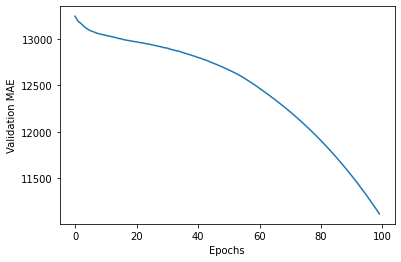

In [79]:
history = model.fit(x_train, y_train, epochs=100, batch_size=512, validation_data=(x_validate, y_validate), verbose=0)

import matplotlib.pyplot as plt

val_mae = history.history['val_mae']

plt.plot(range(0, len(val_mae)), val_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Changing Epochs and Layers

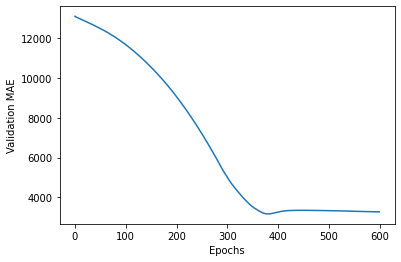

In [84]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(24, ))) # Input Layer
model.add(layers.Dense(6, activation='relu')) # Hidden Layer 3
model.add(layers.Dense(1)) # Output Layer
# Compilation
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Training
history = model.fit(x_train, y_train, epochs=600, batch_size=512, validation_data=(x_validate, y_validate), verbose=0)
# Displaying
val_mae = history.history['val_mae']

plt.plot(range(0, len(val_mae)), val_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Finalizing Model

In [85]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(24, ))) # Input Layer
model.add(layers.Dense(6, activation='relu')) # Hidden Layer 3
model.add(layers.Dense(1)) # Output Layer
# Compilation
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Training
history = model.fit(x_train, y_train, epochs=380, batch_size=512, validation_data=(x_validate, y_validate), verbose=0)

# Evaluation

In [89]:
_, mae = model.evaluate(x_test, y_test)
# Mean Price
mean_price = data['price'].mean()
# error relative to mean_price
mae/mean_price # 37% MAE

2/2 [==============================] - 0s 6ms/step - loss: 39268296.0000 - mae: 4953.2676


0.3730794274482716